In [22]:
import fastf1
import matplotlib.pyplot as plt


#Definizione variabili
year=2023
race_name="Bahrein"
session_type="R"

#Input utente
#year = input("Inserisci l'anno: ")
#race_name = input("Inserisci il nome del GP: ")
#session_type = input("Inserisci il tipo di sessione: ")

#Caricamento sessione
session = fastf1.get_session(year, race_name, session_type)
session.load()


events      WARNING 	Correcting user input 'Bahrein' to 'Bahrain Grand Prix'
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '3

In [24]:
# Ottengo il numero massimo di giri completati da qualsiasi vettura
total_race_laps = laps['LapNumber'].max()

print(total_race_laps)

52.0


In [10]:
#Stimo il carburante rimanente per ogni vettura
fuel_consumption_per_lap = 3
inital_fuel = 110
remaining_fuel = inital_fuel
#Istanzio un contatore
i=0
print(f"Valori iniziali: Carburante = {remaining_fuel}, Giri rimanenti = {total_race_laps}")

while remaining_fuel > 6 and total_race_laps > 0:
    # Calcolo il carburante rimanente dopo un giro
    remaining_fuel -= fuel_consumption_per_lap
    total_race_laps -= 1
    i += 1

    # Stampo i risultati
    print(f"Giro {i}: Carburante rimanente = {remaining_fuel} litri, Giri rimanenti = {total_race_laps}")


# Risultati finali
print("\nRisultati finali:")
print(f"Carburante rimanente: {remaining_fuel} litri")
print(f"Giri completati: {i}")
print(f"Giri rimanenti: {total_race_laps-i}")


Valori iniziali: Carburante = 110, Giri rimanenti = 57.0
Giro 1: Carburante rimanente = 107 litri, Giri rimanenti = 56.0
Giro 2: Carburante rimanente = 104 litri, Giri rimanenti = 55.0
Giro 3: Carburante rimanente = 101 litri, Giri rimanenti = 54.0
Giro 4: Carburante rimanente = 98 litri, Giri rimanenti = 53.0
Giro 5: Carburante rimanente = 95 litri, Giri rimanenti = 52.0
Giro 6: Carburante rimanente = 92 litri, Giri rimanenti = 51.0
Giro 7: Carburante rimanente = 89 litri, Giri rimanenti = 50.0
Giro 8: Carburante rimanente = 86 litri, Giri rimanenti = 49.0
Giro 9: Carburante rimanente = 83 litri, Giri rimanenti = 48.0
Giro 10: Carburante rimanente = 80 litri, Giri rimanenti = 47.0
Giro 11: Carburante rimanente = 77 litri, Giri rimanenti = 46.0
Giro 12: Carburante rimanente = 74 litri, Giri rimanenti = 45.0
Giro 13: Carburante rimanente = 71 litri, Giri rimanenti = 44.0
Giro 14: Carburante rimanente = 68 litri, Giri rimanenti = 43.0
Giro 15: Carburante rimanente = 65 litri, Giri rimane

Carburante necessario per finire la gara con 1 kg: 157 kg
Il carburante iniziale è sufficiente per finire la gara.


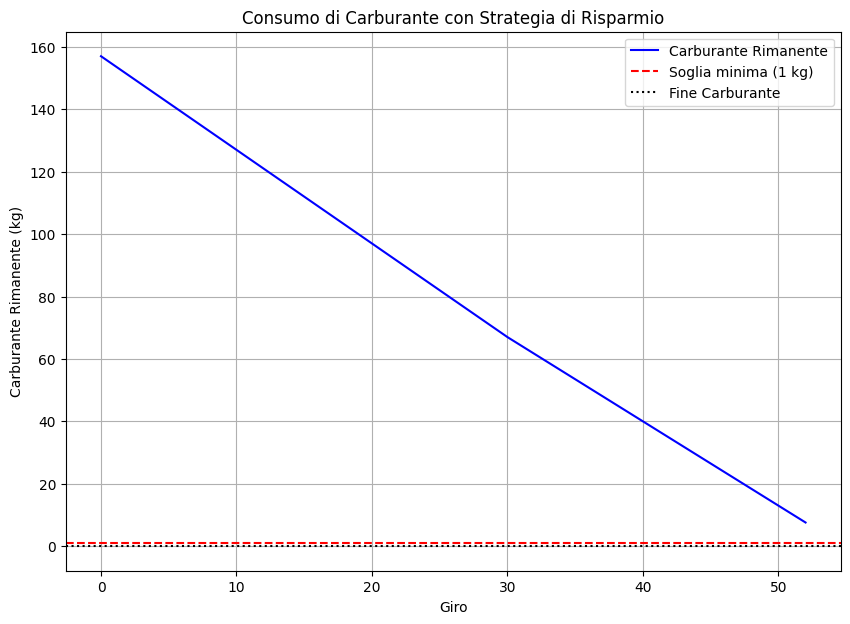

Carburante rimanente alla fine della gara: 7.60 kg


In [11]:
import matplotlib.pyplot as plt

# Parametri iniziali
fuel_consumption_per_lap = 3  # Consumo di carburante per giro (kg)
initial_fuel = 157  # Carburante iniziale (kg)
total_race_laps = 52  # Numero totale di giri della gara
minimum_fuel = 1  # Carburante minimo richiesto alla fine della gara (kg)

# Calcolo del carburante necessario per finire la gara con 1 kg
total_fuel_needed = (total_race_laps * fuel_consumption_per_lap) + minimum_fuel
print(f"Carburante necessario per finire la gara con 1 kg: {total_fuel_needed} kg")

# Verifica se il carburante iniziale è sufficiente
if initial_fuel < total_fuel_needed:
    print("Attenzione: il carburante iniziale non è sufficiente per finire la gara!")
else:
    print("Il carburante iniziale è sufficiente per finire la gara.")

# Simulazione del consumo di carburante con strategia di risparmio
laps_list = []
fuel_remaining_list = []

remaining_fuel = initial_fuel
for lap in range(total_race_laps + 1):
    laps_list.append(lap)
    fuel_remaining_list.append(remaining_fuel)
    
    # Strategia di risparmio carburante: riduci il consumo dopo il giro 30
    if lap >= 30:
        fuel_consumption = fuel_consumption_per_lap * 0.9  # Riduzione del 10%
    else:
        fuel_consumption = fuel_consumption_per_lap
    
    remaining_fuel -= fuel_consumption

# Creazione del grafico
plt.figure(figsize=(10, 7))

# Grafico del consumo di carburante
plt.plot(laps_list, fuel_remaining_list, label="Carburante Rimanente", color="blue", linestyle="-")

# Aggiunta di dettagli al grafico
plt.title("Consumo di Carburante con Strategia di Risparmio")
plt.xlabel("Giro")
plt.ylabel("Carburante Rimanente (kg)")
plt.axhline(y=minimum_fuel, color="red", linestyle="--", label=f"Soglia minima ({minimum_fuel} kg)")
plt.axhline(y=0, color="black", linestyle=":", label="Fine Carburante")
plt.legend()
plt.grid(True)
plt.show()

# Carburante rimanente alla fine della gara
final_fuel = fuel_remaining_list[-1]
print(f"Carburante rimanente alla fine della gara: {final_fuel:.2f} kg")